<a href="https://colab.research.google.com/github/robproject/lre-sendes/blob/main/Uncertainty_and_Sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 2.61426376e-03  2.61426376e+00  1.74284483e-04 -2.78854936e-03
  0.00000000e+00 -2.68129616e+00  3.31970001e-01]
[1.308439338007318, 2.6142637586900066, 1.307218909754174, 1.305738603893495, 1.3071318793450033, 0.8043888488276942, 1.4938650049657178]
[1.3058250742486281, 0.0, 1.3070446252708283, 1.3085271532567595, 1.3071318793450033, 3.4856850115866753, 1.161895003862225]


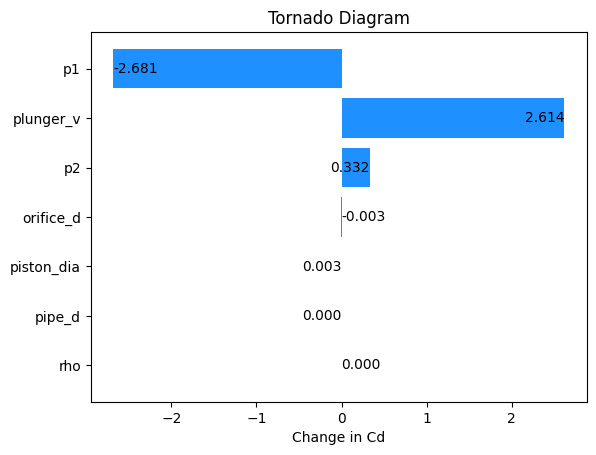

In [ ]:

### Absolute value of sensitivity per variable

import numpy as np
import matplotlib.pyplot as plt

# Define variables and their nominal and deviation values
vars = ['piston_dia', 'plunger_v', 'pipe_d', 'orifice_d', 'rho', 'p1', 'p2']
#       in, in/s, in, in, density, psi, psit

nominal_values = np.array([3, 3, 1, .5, 1, 50, 10])
deviations = nominal_values * np.array([0.0005, 1, 0.0005, .0005, 0, .5, .5])


# Define function to estimate flow rate
def cd(piston_dia, v, d1, d2, rho, p1, p2):
    return (np.pi * (piston_dia/2)**2 * v) / (np.pi / 4 * d2 **2 * (2 * (p1 - p2))/np.sqrt(rho * (1-(d2/d1)**4)))

# Estimate flow rate at nominal values
cd_nominal = cd(*nominal_values)

# Estimate flow rate at nominal values ± deviation for each variable
cd_p = [cd(*(nominal_values + deviations * (np.array(vars) == var))) for var in vars]

cd_n = [cd(*(nominal_values - deviations * (np.array(vars) == var))) for var in vars]

# Calculate sensitivity for each variable
sensitivities = np.array(cd_p) - np.array(cd_n)
print(sensitivities)
print(cd_p)
print(cd_n)



# Sort variables by sensitivity
indices = np.argsort(np.abs(sensitivities))
vars, sensitivities = [np.array(vars)[indices], np.array(sensitivities)[indices]]

# Plot tornado diagram
bars = plt.barh(vars, sensitivities, color='dodgerblue')
plt.xlabel('Change in Cd')
plt.title('Tornado Diagram')

# Add labels to bar ends
for bar, sensitivity in zip(bars, sensitivities):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             '%.3f' % sensitivity,
             va='center', ha='right' if sensitivity > 0 else 'left',
             color='black')

plt.show()

[ 0.00000000e+00  8.70304092e-05  1.30745866e-03 -1.39327545e-03
  1.86733126e-01  1.30713188e+00 -5.02743031e-01]
[ 0.00000000e+00  8.72540742e-05  1.30680510e-03 -1.39527391e-03
  1.45236875e-01  1.30713188e+00 -2.17855313e+00]


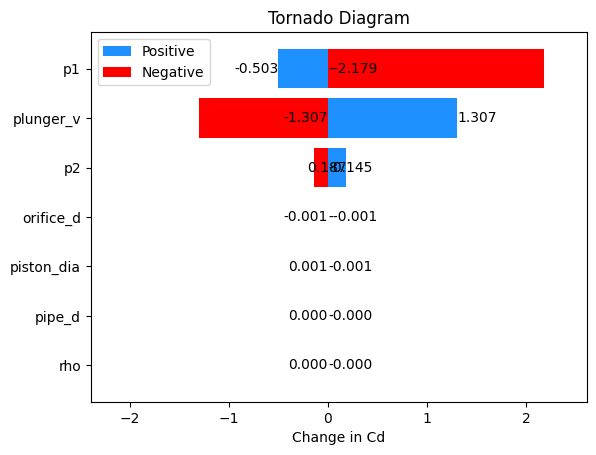

In [ ]:
### Actual value of sensitivity per variable

import numpy as np
import matplotlib.pyplot as plt

# Define variables and their nominal and deviation values
vars = ['piston_dia', 'plunger_v', 'pipe_d', 'orifice_d', 'rho', 'p1', 'p2']
nominal_values = np.array([3, 3, 1, .5, 1, 50, 10])
deviations = nominal_values * np.array([0.0005, 1, 0.0005, .0005, 0, .5, .5])

# Define function to estimate flow rate
def cd(piston_dia, v, d1, d2, rho, p1, p2):
    return (np.pi * (piston_dia/2)**2 * v) / (np.pi / 4 * d2 **2 * (2 * (p1 - p2))/np.sqrt(rho * (1-(d2/d1)**4)))

cd_nominal = cd(*nominal_values)
cd_p = [cd(*(nominal_values + deviations * (np.array(vars) == var))) for var in vars]
cd_n = [cd(*(nominal_values - deviations * (np.array(vars) == var))) for var in vars]

sensitivities_pos = np.array(cd_p) - cd_nominal
sensitivities_neg = cd_nominal - np.array(cd_n)


indices = np.argsort(np.abs(sensitivities_pos + sensitivities_neg))
vars, sensitivities_pos, sensitivities_neg = [np.array(vars)[indices], sensitivities_pos[indices], sensitivities_neg[indices]]
print(sensitivities_pos)
print(sensitivities_neg)
fig, ax = plt.subplots()
# Plot positive and negative sensitivities separately
bars_pos = ax.barh(vars, sensitivities_pos, color='dodgerblue', align='center', label='Positive')
bars_neg = ax.barh(vars, -sensitivities_neg, color='red', align='center', label='Negative')

# Adjusting the x limits to better visualize bars
ax.set_xlim(-max(np.abs(sensitivities_neg)) * 1.1, max(np.abs(sensitivities_pos)) * 2)
ax.set_xlabel('Change in Cd')
ax.set_title('Tornado Diagram')

# Add labels to bar ends for positive sensitivities
for bar, sensitivity in zip(bars_pos, sensitivities_pos):
    ax.text(bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()/2,
             '%.3f' % sensitivity, va='center', ha='left' if sensitivity > 1 else 'right', color='black')

# Add labels to bar ends for negative sensitivities
for bar, sensitivity in zip(bars_neg, sensitivities_neg):
    ax.text(bar.get_x(), bar.get_y() + bar.get_height()/2,
             '-%.3f' % sensitivity, va='center', ha='right' if sensitivity > 1 else 'left', color='black')

ax.legend()
plt.show()


[74.75793279 76.20977202 75.68364403 ... 74.53506339 77.6034055
 77.46326557]


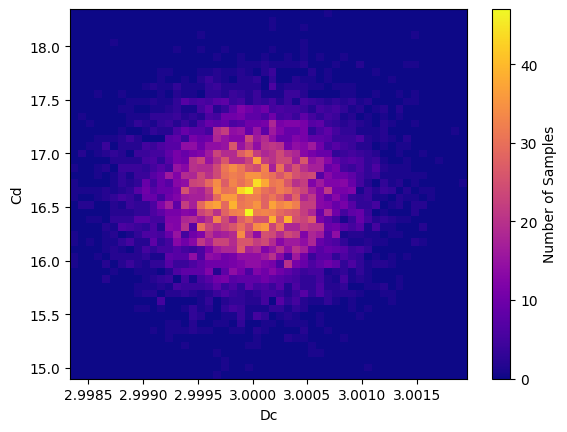

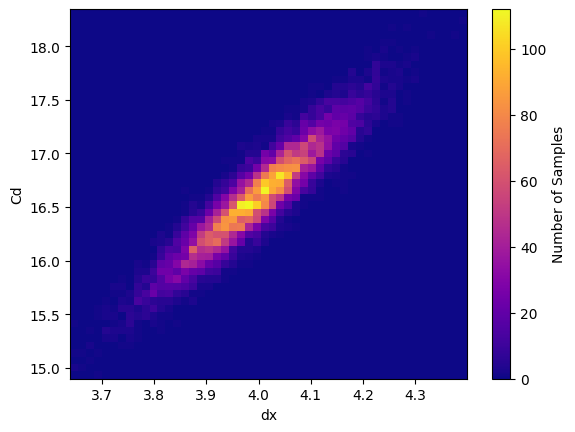

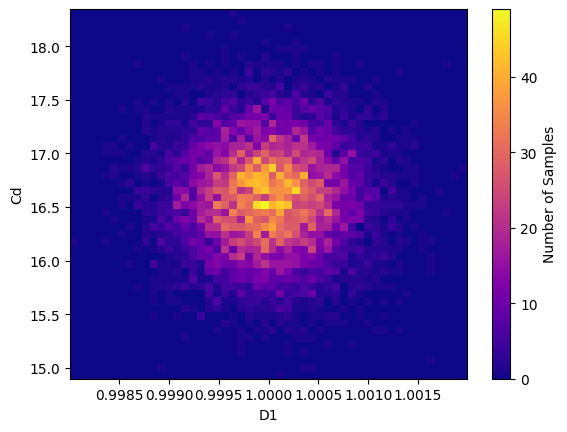

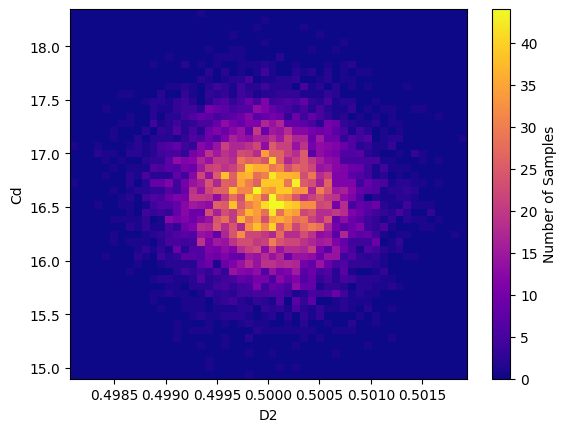

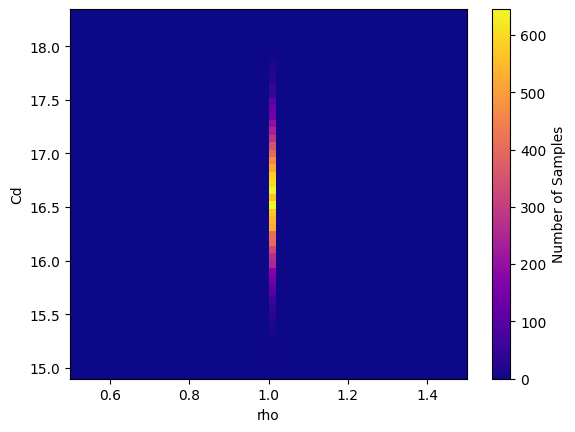

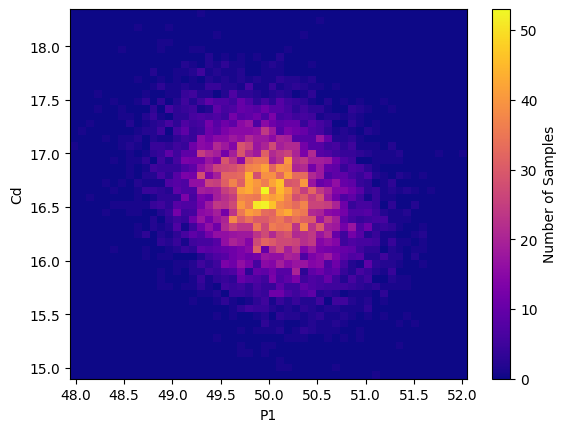

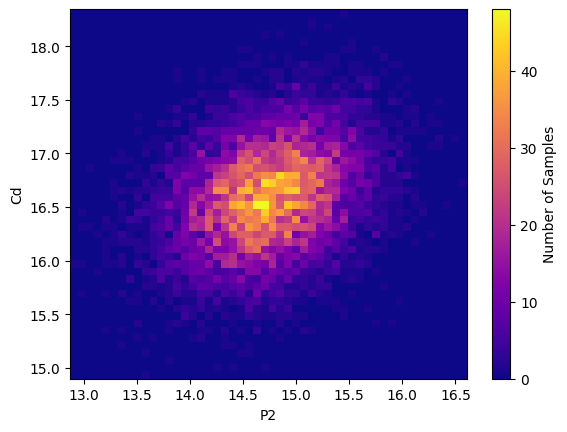

In [ ]:

# Number of simulations
N = 10000

# Define nominal values and uncertainties for variables
nominal_values = {
    'Dc': 3, # in
    'dx': 4, # in/s
    'D1': 1, # in
    'D2': .5, # in
    'rho': 1, # kg/m^3
    'P1': 50, # psi
    'P2': 14.75, # psi

}

uncertainties = {
    'Dc': .0005, # in
    'dx': .1, # in/s
    'D1': 0.0005, # in
    'D2': .0005, # in
    'rho': 0, # kg/m^3
    'P1': .5, # psi
    'P2': .5, # psi
}

# Generate N random samples for each variable, assuming a normal distribution
samples = {var: np.random.normal(nominal_values[var], uncertainties[var], N) for var in nominal_values}

# Calculate flow rate for each sample
Cd_values = (samples['dx'] * (samples['Dc']/2)**2 * np.pi) / (np.pi / 4 * samples['D2']**2 * np.sqrt(2 * (samples['P1'] - samples['P2']) / (samples['rho'] * (1-(samples['D2']-samples['D1'])**4))))
print((2 * (samples['P1'] - samples['P2']) / (samples['rho'] * (1-(samples['D2']/samples['D1'])**4))))

# Analyze results
for var in nominal_values:
    plt.figure()
    plt.hist2d(samples[var], Cd_values, bins=50, cmap='plasma')
    plt.xlabel(var)
    plt.ylabel('Cd')
    plt.colorbar(label='Number of Samples')
    plt.show()


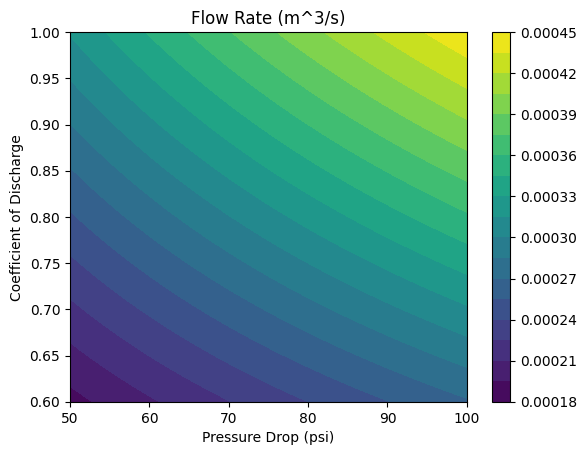

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define constants
A = 0.001 # area of the orifice (m^2)
rho = 1000 # density of the fluid (kg/m^3)

# Define range of variables
Cd_values = np.linspace(0.6, 1, 100) # coefficient of discharge
DP_values = np.linspace(50, 100, 100) # pressure drop (psi)

# Calculate flow rate for each combination of Cd and DP
Q_values = np.zeros((100, 100))
for i, Cd in enumerate(Cd_values):
    for j, DP in enumerate(DP_values):
        Q_values[i, j] = Cd * A * np.sqrt((2 * DP) / rho)

# Plot results
plt.contourf(DP_values, Cd_values, Q_values, levels=20)
plt.xlabel('Pressure Drop (psi)')
plt.ylabel('Coefficient of Discharge')
plt.title('Flow Rate (m^3/s)')
plt.colorbar()
plt.show()
